In [13]:
import nibabel as nib 
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from skimage.metrics import mean_squared_error as mse
from scipy.spatial.distance import jensenshannon
import pandas as pd
from tqdm import tqdm
from math import log10
from scipy.stats import entropy
from scipy.interpolate import make_interp_spline
from scipy.stats import rankdata
from ridgeplot import ridgeplot
import ptitprince as pt
from scipy.stats import wilcoxon, ranksums, mannwhitneyu
from statannotations.Annotator import Annotator

In [2]:
#Show the emphysema distribution for the best epoch on the validation data
b30f_ref = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/B30f_B50f/soft/emphysema_masked/emph.csv")
b30f_ref = b30f_ref.sort_values(by = "pid")
b50f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/B30f_B50f/hard/emphysema_masked/emph.csv")
b50f = b50f.sort_values(by = "pid")
bone = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/STANDARD_BONE/hard/emphysema/emph.csv")
bone = bone.sort_values(by = "pid")
bone_std = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/STANDARD_BONE/soft/emphysema/emph.csv")
bone_std = bone_std.sort_values(by = "pid")


b30f_ref['Kernel'] = 'B30f (reference)'
b50f['Kernel'] = 'B50f'
bone['Kernel'] = 'BONE'
bone_std['Kernel'] = 'STANDARD'

bonetob30f_cycgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/BONEtoB30f_emphysema/emph.csv")
bonetob30f_cycgan = bonetob30f_cycgan.sort_values(by = "pid")
stdtob30f_cycgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/STDtoB30f_emphysema/emph.csv")
stdtob30f_cycgan = stdtob30f_cycgan.sort_values(by = "pid")
b50ftob30f_cycgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/B50ftoB30f_emphysema/emph.csv")
b50ftob30f_cycgan = b50ftob30f_cycgan.sort_values(by = "pid")
bonetostd_cycgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/BONEtoSTD_emphysema/emph.csv")
bonetostd_cycgan = bonetostd_cycgan.sort_values(by = "pid")

bonetob30f_switchgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/BONEtoB30f_emphysema/emph.csv")
bonetob30f_switchgan = bonetob30f_switchgan.sort_values(by = "pid")
stdtob30f_switchgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/STDtoB30f_emphysema/emph.csv")
stdtob30f_switchgan = stdtob30f_switchgan.sort_values(by = "pid")
b50ftob30f_switchgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/B50ftoB30f_emphysema/emph.csv")
b50ftob30f_switchgan = b50ftob30f_switchgan.sort_values(by = "pid")
bonetostd_switchgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/BONEtoSTD_emphysema/emph.csv")
bonetostd_switchgan = bonetostd_switchgan.sort_values(by = "pid")


bonetob30f_multipath = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/BONEtoB30f_emphysema/emph.csv")
bonetob30f_multipath = bonetob30f_multipath.sort_values(by = "pid")
stdtob30f_multipath = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/STDtoB30f_emphysema/emph.csv")
stdtob30f_multipath = stdtob30f_multipath.sort_values(by = "pid")
b50ftob30f_multipath = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/B50ftoB30f_emphysema/emph.csv")
b50ftob30f_multipath = b50ftob30f_multipath.sort_values(by = "pid")
bonetostd_multipath = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/BONEtoSTD_emphysema/emph.csv")
bonetostd_multipath = bonetostd_multipath.sort_values(by = "pid")

bonetob30f_multipathanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/BONEtoB30f_emphysema/emph.csv")
bonetob30f_multipathanatomy = bonetob30f_multipathanatomy.sort_values(by = "pid")
stdtob30f_multipathanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/STDtoB30f_emphysema/emph.csv")
stdtob30f_multipathanatomy = stdtob30f_multipathanatomy.sort_values(by = "pid")
b50ftob30f_multipathanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/B50ftoB30f_emphysema/emph.csv")
b50ftob30f_multipathanatomy = b50ftob30f_multipathanatomy.sort_values(by = "pid")
bonetostd_multipathanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/BONEtoSTD_emphysema/emph.csv")
bonetostd_multipathanatomy = bonetostd_multipathanatomy.sort_values(by = "pid")


bonetob30f_cycgan['Kernel'] = 'BONEtoB30f'
stdtob30f_cycgan['Kernel'] = 'STANDARDtoB30f'
b50ftob30f_cycgan['Kernel'] = 'B50ftoB30f'

bonetob30f_switchgan['Kernel'] = 'BONEtoB30f'
stdtob30f_switchgan['Kernel'] = 'STANDARDtoB30f'
b50ftob30f_switchgan['Kernel'] = 'B50ftoB30f'

bonetob30f_multipath['Kernel'] = 'BONEtoB30f'
stdtob30f_multipath['Kernel'] = 'STANDARDtoB30f'
b50ftob30f_multipath['Kernel'] = 'B50ftoB30f'

bonetob30f_multipathanatomy['Kernel'] = 'BONEtoB30f'
stdtob30f_multipathanatomy['Kernel'] = 'STANDARDtoB30f'
b50ftob30f_multipathanatomy['Kernel'] = 'B50ftoB30f'


emph_before = pd.concat([b30f_ref, b50f, bone, bone_std])
emph_after_multipathanatomy = pd.concat([b30f_ref, b50ftob30f_multipathanatomy,bonetob30f_multipathanatomy,stdtob30f_multipathanatomy])
emph_after_multipath = pd.concat([b30f_ref, b50ftob30f_multipath,bonetob30f_multipath,stdtob30f_multipath])
emph_after_cyclegan = pd.concat([b30f_ref, b50ftob30f_cycgan, bonetob30f_cycgan, stdtob30f_cycgan])
emph_after_switchgan = pd.concat([b30f_ref, b50ftob30f_switchgan, bonetob30f_switchgan, stdtob30f_switchgan])

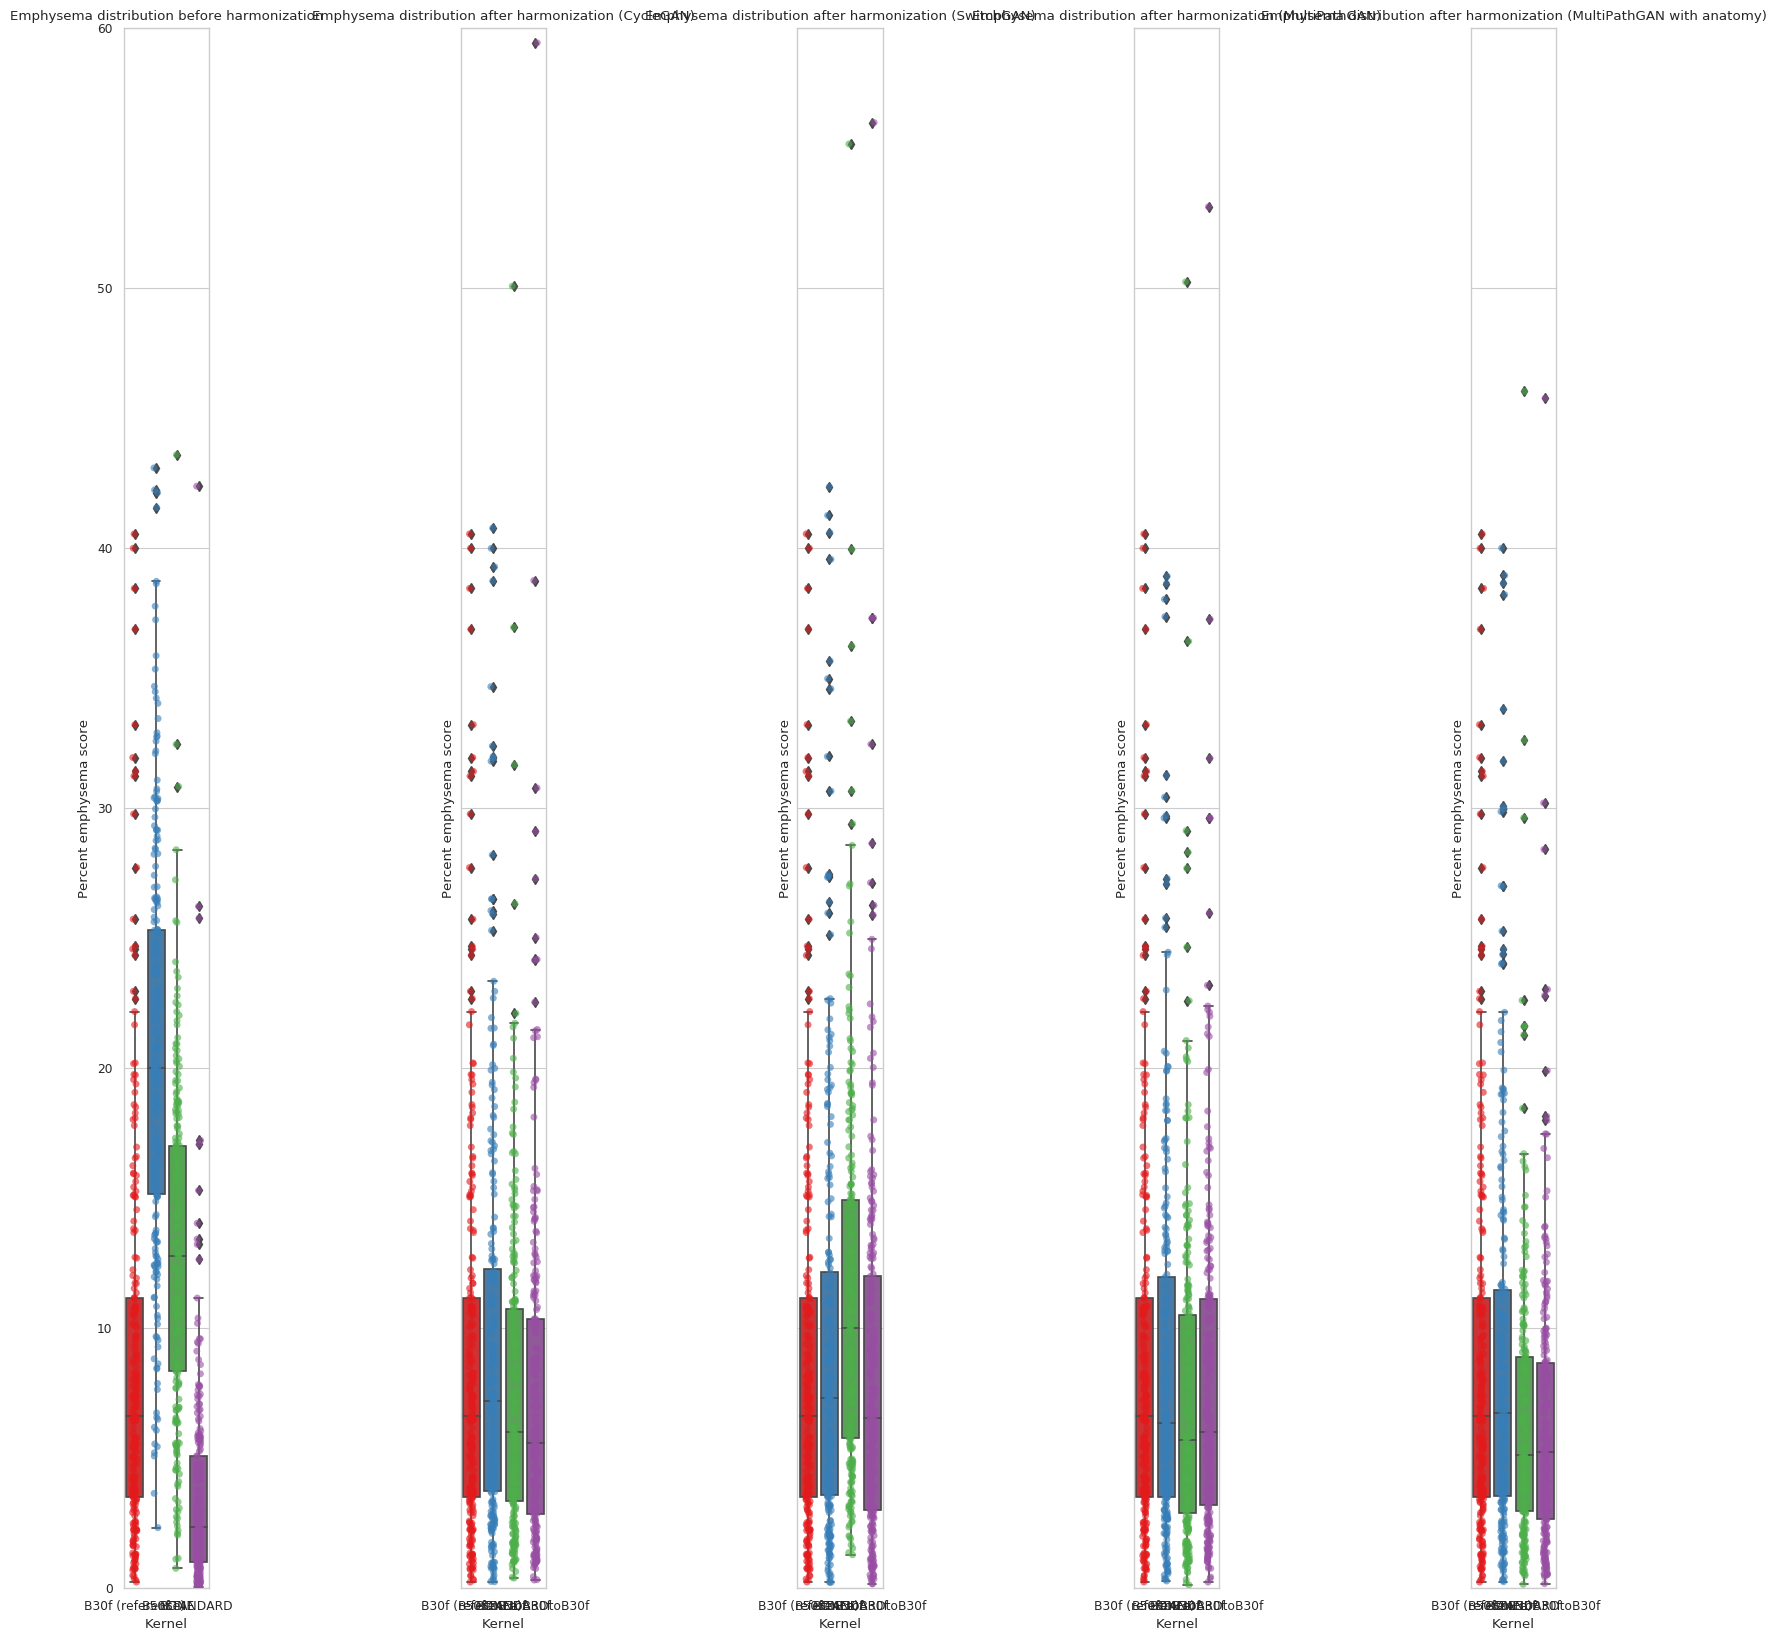

In [3]:
np.random.seed(42)

# Set the theme, context, and style
sns.set_theme()
sns.set_context("paper")
sns.set_style("whitegrid")

# Create a figure with 3 subplots
fig, ax = plt.subplots(1, 5, figsize=(16.5, 16.5), sharey=True)

# Make a violinplot for the emphysema distribution before harmonization
sns.boxplot(data=emph_before, x="Kernel", y="emph_score", ax=ax[0], palette="Set1")
sns.stripplot(data=emph_before, x="Kernel", y="emph_score", ax=ax[0], palette="Set1", dodge=True, alpha=0.6)
ax[0].set_title("Emphysema distribution before harmonization")
ax[0].set_ylim(0, 60)
ax[0].set_ylabel("Percent emphysema score")

# Make a violinplot for the emphysema distribution after harmonization (CycleGAN)
sns.boxplot(data=emph_after_cyclegan, x="Kernel", y="emph_score", ax=ax[1], palette="Set1")
sns.stripplot(data=emph_after_cyclegan, x="Kernel", y="emph_score", ax=ax[1], palette="Set1", dodge=True, alpha=0.6)
ax[1].set_title("Emphysema distribution after harmonization (CycleGAN)")
ax[1].set_ylim(0, 60)
ax[1].set_ylabel("Percent emphysema score")


# Make a violinplot for the emphysema distribution after harmonization (SwitchGAN)
sns.boxplot(data=emph_after_switchgan, x="Kernel", y="emph_score", ax=ax[2], palette="Set1")
sns.stripplot(data=emph_after_switchgan, x="Kernel", y="emph_score", ax=ax[2], palette="Set1", dodge=True, alpha=0.6)
ax[2].set_title("Emphysema distribution after harmonization (SwitchGAN)")
ax[2].set_ylim(0, 60)
ax[2].set_ylabel("Percent emphysema score")


sns.boxplot(data=emph_after_multipath, x="Kernel", y="emph_score", ax=ax[3], palette="Set1")
sns.stripplot(data=emph_after_multipath, x="Kernel", y="emph_score", ax=ax[3], palette="Set1", dodge=True, alpha=0.6)
ax[3].set_title("Emphysema distribution after harmonization (MultiPathGAN)")
ax[3].set_ylim(0, 60)
ax[3].set_ylabel("Percent emphysema score")

sns.boxplot(data=emph_after_multipathanatomy, x="Kernel", y="emph_score", ax=ax[4], palette="Set1")
sns.stripplot(data=emph_after_multipathanatomy, x="Kernel", y="emph_score", ax=ax[4], palette="Set1", dodge=True, alpha=0.6)
ax[4].set_title("Emphysema distribution after harmonization (MultiPathGAN with anatomy)")
ax[4].set_ylim(0, 60)
ax[4].set_ylabel("Percent emphysema score")

# Adjust the layout to prevent overlap
plt.tight_layout()

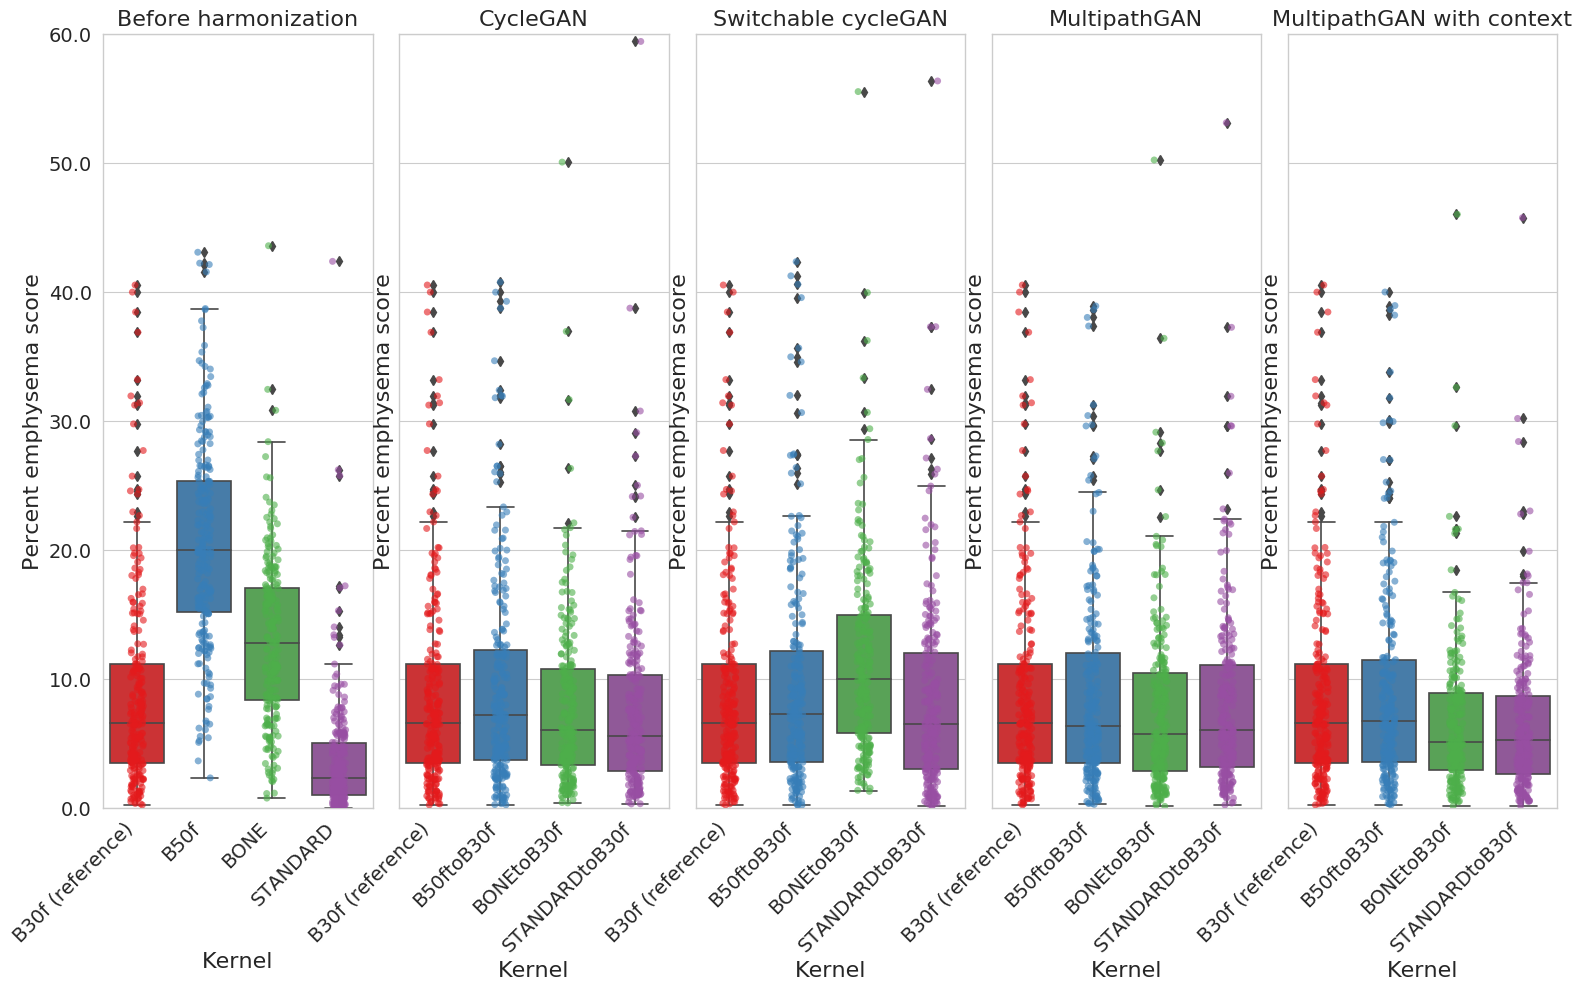

In [4]:
np.random.seed(42)

# Set the theme, context, and style
sns.set_theme()
sns.set_context("paper")
sns.set_style("whitegrid")

# Create a figure with 5 subplots
fig, ax = plt.subplots(1, 5, figsize=(16.5, 10), sharey=True)

# Make a boxplot for the emphysema distribution before harmonization
sns.boxplot(data=emph_before, x="Kernel", y="emph_score", ax=ax[0], palette="Set1")
sns.stripplot(data=emph_before, x="Kernel", y="emph_score", ax=ax[0], palette="Set1", dodge=True, alpha=0.6)
ax[0].set_title("Before harmonization", fontsize=16)
ax[0].set_ylim(0, 60)
ax[0].set_ylabel("Percent emphysema score", fontsize=16)
ax[0].set_xlabel("Kernel", fontsize=16)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=14)

# Make a boxplot for the emphysema distribution after harmonization (CycleGAN)
sns.boxplot(data=emph_after_cyclegan, x="Kernel", y="emph_score", ax=ax[1], palette="Set1")
sns.stripplot(data=emph_after_cyclegan, x="Kernel", y="emph_score", ax=ax[1], palette="Set1", dodge=True, alpha=0.6)
ax[1].set_title("CycleGAN", fontsize=16)
ax[1].set_ylim(0, 60)
ax[1].set_ylabel("Percent emphysema score", fontsize=16)
ax[1].set_xlabel("Kernel", fontsize=16)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax[1].set_yticklabels(ax[1].get_yticks(), fontsize=14)

# Make a boxplot for the emphysema distribution after harmonization (SwitchGAN)
sns.boxplot(data=emph_after_switchgan, x="Kernel", y="emph_score", ax=ax[2], palette="Set1")
sns.stripplot(data=emph_after_switchgan, x="Kernel", y="emph_score", ax=ax[2], palette="Set1", dodge=True, alpha=0.6)
ax[2].set_title("Switchable cycleGAN", fontsize=16)
ax[2].set_ylim(0, 60)
ax[2].set_ylabel("Percent emphysema score", fontsize=16)
ax[2].set_xlabel("Kernel", fontsize=16)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax[2].set_yticklabels(ax[2].get_yticks(), fontsize=14)

# Make a boxplot for the emphysema distribution after harmonization (MultiPathGAN)
sns.boxplot(data=emph_after_multipath, x="Kernel", y="emph_score", ax=ax[3], palette="Set1")
sns.stripplot(data=emph_after_multipath, x="Kernel", y="emph_score", ax=ax[3], palette="Set1", dodge=True, alpha=0.6)
ax[3].set_title("MultipathGAN", fontsize=16)
ax[3].set_ylim(0, 60)
ax[3].set_ylabel("Percent emphysema score", fontsize=16)
ax[3].set_xlabel("Kernel", fontsize=16)
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax[3].set_yticklabels(ax[3].get_yticks(), fontsize=14)

# Make a boxplot for the emphysema distribution after harmonization (MultiPathGAN with anatomy)
sns.boxplot(data=emph_after_multipathanatomy, x="Kernel", y="emph_score", ax=ax[4], palette="Set1")
sns.stripplot(data=emph_after_multipathanatomy, x="Kernel", y="emph_score", ax=ax[4], palette="Set1", dodge=True, alpha=0.6)
ax[4].set_title("MultipathGAN with context", fontsize=16)
ax[4].set_ylim(0, 60)
ax[4].set_ylabel("Percent emphysema score", fontsize=16)
ax[4].set_xlabel("Kernel", fontsize=16)
ax[4].set_xticklabels(ax[4].get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax[4].set_yticklabels(ax[4].get_yticks(), fontsize=14)

# Adjust the layout to remove spaces between subplots and reduce whitespace on the right
plt.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0, right=0.95)
plt.savefig("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/emphysema_distribution_unpaired.png", dpi=300)

# Show the plot
plt.show()

In [5]:
bonetob30f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/bonetob30f_finalresults.csv")
stdtob30f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/stdtob30f_finalresults.csv")

bonetob30f_multipathwithanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/BONEtoB30f.csv")
stdtob30f_multipathwithanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/STDtoB30f.csv")

merged_bonetob30f = pd.merge(bonetob30f, bonetob30f_multipathwithanatomy, on = "Patient")
merged_bonetob30f.to_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/bonetob30f_finalresults.csv")

merged_stdtob30f = pd.merge(stdtob30f, stdtob30f_multipathwithanatomy, on = "Patient")
merged_stdtob30f.to_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/stdtob30f_finalresults.csv")

In [6]:
bonetob30f_multi_muscle = list(bonetob30f['Dice_Multipath_Muscle'])
bonetob30f_multi_fat = list(bonetob30f['Dice_Multipath_Fat'])
bonetob30f_cycgan_muscle = list(bonetob30f['Dice_CycleGAN_Muscle'])
bonetob30f_cycgan_fat = list(bonetob30f['Dice_CycleGAN_Fat'])
bonetob30f_switchgan_muscle = list(bonetob30f['Dice_SwitchGAN_Muscle'])
bonetob30f_switchgan_fat = list(bonetob30f['Dice_SwitchGAN_Fat'])
bonetob30f_multipath_anatomy = list(merged_bonetob30f['Dice_Multipath_with_anatomy_context_Muscle'])
bonetob30f_multipath_anatomy_fat = list(merged_bonetob30f['Dice_Multipath_with_anatomy_Fat'])

stdtob30f_multi_muscle = list(stdtob30f['Dice_Multipath_Muscle'])
stdtob30f_multi_fat = list(stdtob30f['Dice_Multipath_Fat'])
stdtob30f_cycgan_muscle = list(stdtob30f['Dice_CycleGAN_Muscle'])
stdtob30f_cycgan_fat = list(stdtob30f['Dice_CycleGAN_Fat'])
stdtob30f_switchgan_muscle = list(stdtob30f['Dice_SwitchGAN_Muscle'])
stdtob30f_switchgan_fat = list(stdtob30f['Dice_SwitchGAN_Fat'])
stdtob30f_multipath_anatomy = list(merged_stdtob30f['Dice_Multipath_with_anatomy_context_Muscle'])
stdtob30f_multipath_anatomy_fat = list(merged_stdtob30f['Dice_Multipath_with_anatomy_Fat']) 

In [7]:
muscle_data = {
    'Value': bonetob30f_cycgan_muscle + bonetob30f_multi_muscle + bonetob30f_switchgan_muscle + bonetob30f_multipath_anatomy +
             stdtob30f_cycgan_muscle + stdtob30f_multi_muscle + stdtob30f_switchgan_muscle + stdtob30f_multipath_anatomy,
    'Method': ['CycleGAN'] * len(bonetob30f_cycgan_muscle) + ['MultipathGAN'] * len(bonetob30f_multi_muscle) + ['SwitchGAN'] * len(bonetob30f_switchgan_muscle) + ['MultipathGAN_with_context'] * len(bonetob30f_multipath_anatomy) +
              ['CycleGAN'] * len(stdtob30f_cycgan_muscle) + ['MultipathGAN'] * len(stdtob30f_multi_muscle) + ['SwitchGAN'] * len(stdtob30f_switchgan_muscle) + ['MultipathGAN_with_context'] * len(stdtob30f_multipath_anatomy),
    'Kernel': ['GE BONE'] * (len(bonetob30f_cycgan_muscle) + len(bonetob30f_multi_muscle) + len(bonetob30f_switchgan_muscle) + len(bonetob30f_multipath_anatomy)) +
              ['GE STD'] * (len(stdtob30f_cycgan_muscle) + len(stdtob30f_multi_muscle) + len(stdtob30f_switchgan_muscle) + len(bonetob30f_multipath_anatomy_fat)) 
}

fat_data = {
    'Value': bonetob30f_cycgan_fat + bonetob30f_multi_fat + bonetob30f_switchgan_fat + bonetob30f_multipath_anatomy_fat +
             stdtob30f_cycgan_fat + stdtob30f_multi_fat + stdtob30f_switchgan_fat + stdtob30f_multipath_anatomy_fat,
    'Method': ['CycleGAN'] * len(bonetob30f_cycgan_fat) + ['MultipathGAN'] * len(bonetob30f_multi_fat) + ['SwitchGAN'] * len(bonetob30f_switchgan_fat) + ['MultipathGAN_with_context'] * len(bonetob30f_multipath_anatomy_fat) +
              ['CycleGAN'] * len(stdtob30f_cycgan_fat) + ['MultipathGAN'] * len(stdtob30f_multi_fat) + ['SwitchGAN'] * len(stdtob30f_switchgan_fat) + ['MultipathGAN_with_context'] * len(stdtob30f_multipath_anatomy_fat),
    'Kernel': ['GE BONE'] * (len(bonetob30f_cycgan_fat) + len(bonetob30f_multi_fat) + len(bonetob30f_switchgan_fat) + len(bonetob30f_multipath_anatomy_fat)) +
              ['GE STD'] * (len(stdtob30f_cycgan_fat) + len(stdtob30f_multi_fat) + len(stdtob30f_switchgan_fat) + len(bonetob30f_multipath_anatomy_fat)) 
}

In [9]:
muscle_data

{'Value': [0.8438989197385187,
  0.7836486642650151,
  0.8634845714097431,
  0.8821545064056233,
  0.8447652625855026,
  0.7980375094869026,
  0.8411420874631034,
  0.8938336699379364,
  0.8846627019201219,
  0.8130213972346072,
  0.8767560129403594,
  0.8854439794328495,
  0.8623256185656264,
  0.8465320296718428,
  0.8560677078446346,
  0.8787202732841065,
  0.8619549437992423,
  0.8495195859866238,
  0.850833116900033,
  0.8552678962895478,
  0.8811909368812637,
  0.8657544226749321,
  0.8945367731932246,
  0.8718634414272486,
  0.8444486730331948,
  0.8687392558491885,
  0.8334240446328678,
  0.8302507405111249,
  0.8527993173607987,
  0.8731575875667217,
  0.8699773365914324,
  0.864535369675607,
  0.8044305358762908,
  0.853277084572904,
  0.868649174264223,
  0.8361243980525924,
  0.8516485901998678,
  0.8996709146785165,
  0.8729317768427387,
  0.8025429538621689,
  0.8221413612366928,
  0.8954879547074902,
  0.8603283756093052,
  0.8407183347813115,
  0.8429584627030506,
  0.8

In [14]:
muscle_df = pd.DataFrame(muscle_data)
fat_df = pd.DataFrame(fat_data)

In [15]:
muscle_df

,Value,Method,Kernel
0,0.843899,CycleGAN,GE BONE
1,0.783649,CycleGAN,GE BONE
2,0.863485,CycleGAN,GE BONE
3,0.882155,CycleGAN,GE BONE
4,0.844765,CycleGAN,GE BONE
...,...,...,...
1915,0.936216,MultipathGAN_with_context,GE STD
1916,0.946224,MultipathGAN_with_context,GE STD
1917,0.943163,MultipathGAN_with_context,GE STD
1918,0.913610,MultipathGAN_with_context,GE STD


In [19]:
import pandas as pd
from scipy.stats import wilcoxon

# Assuming muscle_df is already defined
# Filter the dataframe for each comparison and perform the Wilcoxon signed-rank test

comparisons = [
    ("MultipathGAN_with_context", "MultipathGAN"),
    ("MultipathGAN_with_context", "CycleGAN"),
    ("MultipathGAN_with_context", "SwitchGAN")
]

kernels = ["GE BONE", "GE STD"]
p_values = {}

for kernel in kernels:
    for method1, method2 in comparisons:
        data1 = muscle_df[(muscle_df['Method'] == method1) & (muscle_df['Kernel'] == kernel)]['Value']
        data2 = muscle_df[(muscle_df['Method'] == method2) & (muscle_df['Kernel'] == kernel)]['Value']
        
        # Perform the Wilcoxon signed-rank test
        stat, p_value = wilcoxon(data1, data2)
        p_values[(method1, method2, kernel)] = p_value

# Print the p-values
for (method1, method2, kernel), p_value in p_values.items():
    print(f"P-value for {method1} vs {method2} for {kernel}: {p_value}")

P-value for MultipathGAN_with_context vs MultipathGAN for GE BONE: 4.628119435952928e-24
P-value for MultipathGAN_with_context vs CycleGAN for GE BONE: 4.015256434384509e-41
P-value for MultipathGAN_with_context vs SwitchGAN for GE BONE: 1.2843476876579314e-40
P-value for MultipathGAN_with_context vs MultipathGAN for GE STD: 4.015256434384509e-41
P-value for MultipathGAN_with_context vs CycleGAN for GE STD: 4.015256434384509e-41
P-value for MultipathGAN_with_context vs SwitchGAN for GE STD: 2.432964711399547e-14


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
GE STD_SwitchGAN v.s. GE STD_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.460e-13 stat=6.250e+03
Using zero_method  wilcox
GE BONE_SwitchGAN v.s. GE BONE_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correction, P_val=7.706e-40 stat=9.300e+01
Using zero_method  wilcox
GE BONE_MultipathGAN v.s. GE BONE_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.777e-23 stat=3.567e+03
Using zero_method  wilcox
GE STD_MultipathGAN v.s. GE STD_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.409e-40 stat=0.000e+00
Using zero_method  wilcox
GE BONE_CycleGAN v.s. GE BONE_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correcti

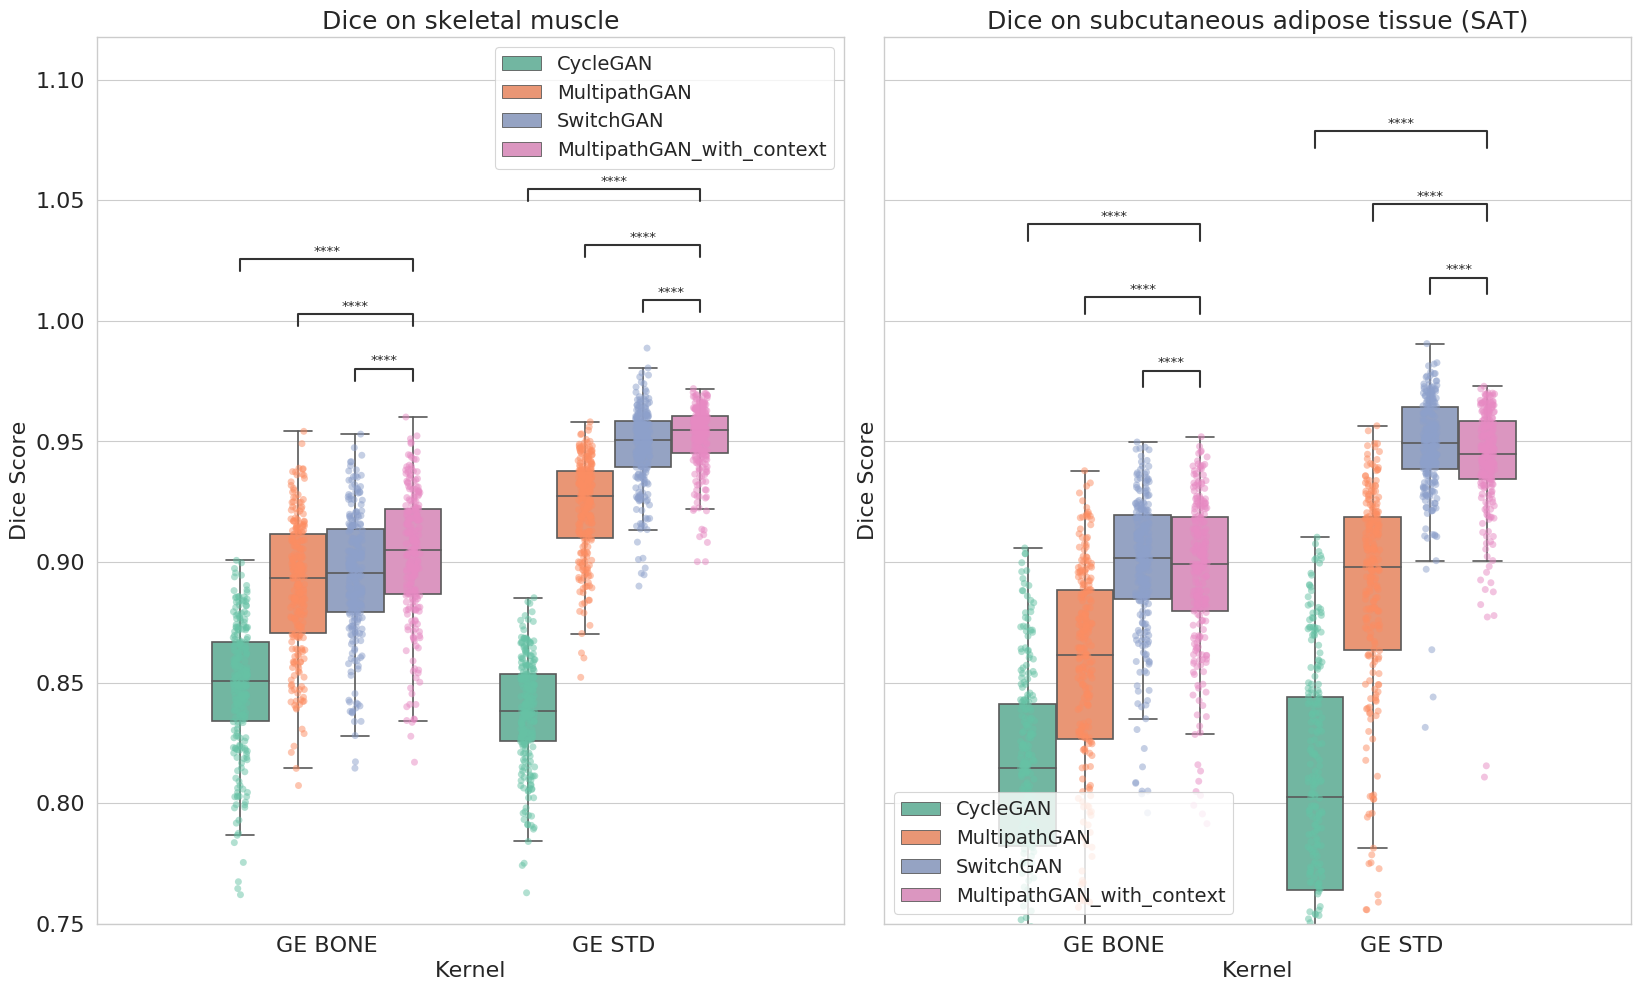

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
from scipy.stats import wilcoxon, ttest_rel

# Assuming muscle_data and fat_data are already defined
muscle_df = pd.DataFrame(muscle_data)
fat_df = pd.DataFrame(fat_data)

fig, axes = plt.subplots(1, 2, figsize=(16.5, 10), sharey=True)

# Plot the muscle data
sns.boxplot(x='Kernel', y='Value', hue='Method', data=muscle_df, ax=axes[0], palette='Set2', showfliers=False)
sns.stripplot(x='Kernel', y='Value', hue='Method', data=muscle_df, ax=axes[0], palette='Set2', dodge=True, alpha=0.5)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[0:4], labels[0:4], loc='best', fontsize=14)
axes[0].set_title("Dice on skeletal muscle", fontsize=18)
axes[0].set_xlabel("Kernel", fontsize=16)
axes[0].set_ylabel("Dice Score", fontsize=16)
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)

# Add statistical annotations for muscle data
add_stat_annotation(axes[0], data=muscle_df, x='Kernel', y='Value', hue='Method',
                    box_pairs=[(("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "CycleGAN")),
                               (("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "MultipathGAN")),
                               (("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "SwitchGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "CycleGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "MultipathGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "SwitchGAN"))],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

# Plot the fat data
sns.boxplot(x='Kernel', y='Value', hue='Method', data=fat_df, ax=axes[1], palette='Set2', showfliers=False)
sns.stripplot(x='Kernel', y='Value', hue='Method', data=fat_df, ax=axes[1], palette='Set2', dodge=True, alpha=0.5)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[0:4], labels[0:4], loc='lower left', fontsize=14)
axes[1].set_title("Dice on subcutaneous adipose tissue (SAT)", fontsize=18)
axes[1].set_xlabel("Kernel", fontsize=16)
axes[1].set_ylabel("Dice Score", fontsize=16)
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)

# Add statistical annotations for fat data
add_stat_annotation(axes[1], data=fat_df, x='Kernel', y='Value', hue='Method',
                    box_pairs=[(("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "CycleGAN")),
                               (("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "MultipathGAN")),
                               (("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "SwitchGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "CycleGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "MultipathGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "SwitchGAN"))],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

plt.tight_layout()
# plt.savefig("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/dice_scores_unpaired.png", dpi=300)
plt.show()

In [25]:
##Checking how stats are on the old results

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
Philips D_MultipathGAN v.s. Philips D_CycleGAN: Wilcoxon test (paired samples) with Bonferroni correction, P_val=4.015e-40 stat=0.000e+00
Using zero_method  wilcox
Philips C_MultipathGAN v.s. Philips C_CycleGAN: Wilcoxon test (paired samples) with Bonferroni correction, P_val=4.015e-40 stat=0.000e+00
Using zero_method  wilcox
GE LUNG_MultipathGAN v.s. GE LUNG_CycleGAN: Wilcoxon test (paired samples) with Bonferroni correction, P_val=4.015e-40 stat=0.000e+00
Using zero_method  wilcox
GE BONE_MultipathGAN v.s. GE BONE_CycleGAN: Wilcoxon test (paired samples) with Bonferroni correction, P_val=5.159e-40 stat=2.000e+01
Using zero_method  wilcox
GE STD_MultipathGAN v.s. GE STD_CycleGAN: Wilcoxon test (paired samples) with Bonferroni correction, P_val=4.015e-40 stat=0.000e+00
Using zero_method  wilcox
Phil

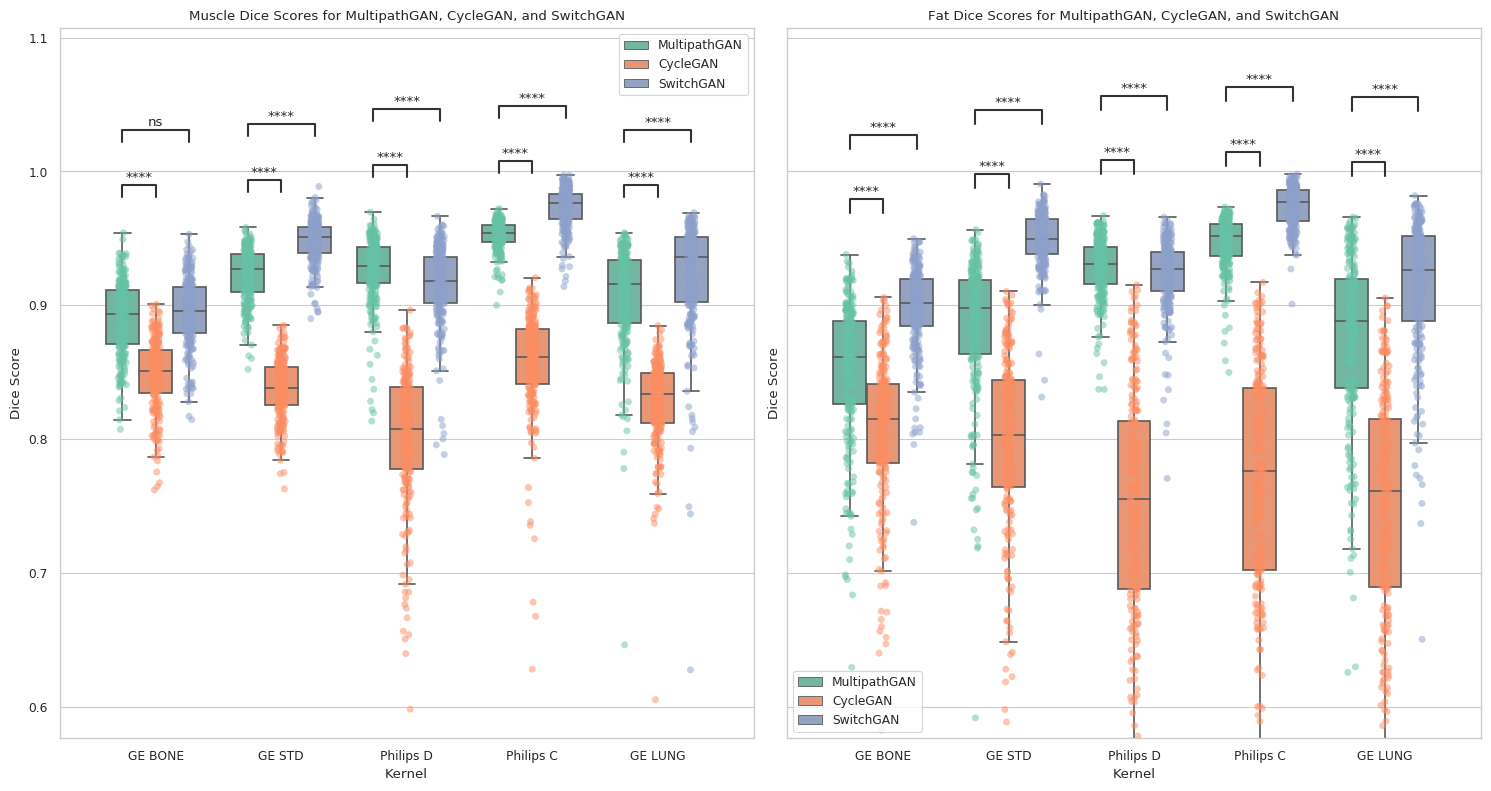

In [28]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from statannot import add_stat_annotation
# from scipy.stats import wilcoxon

# # Load the data
# dtob30f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/dtob30f_finalresults.csv")
# ctob30f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/ctob30f_finalresults.csv")
# lungtob30f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/lungtob30f_finalresults.csv")
# bonetob30f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/bonetob30f_finalresults.csv")
# stdtob30f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/stdtob30f_finalresults.csv")

# # Prepare the data
# muscle_data = {
#     'Value': bonetob30f['Dice_Multipath_Muscle'].tolist() + bonetob30f['Dice_CycleGAN_Muscle'].tolist() + bonetob30f['Dice_SwitchGAN_Muscle'].tolist() +
#              stdtob30f['Dice_Multipath_Muscle'].tolist() + stdtob30f['Dice_CycleGAN_Muscle'].tolist() + stdtob30f['Dice_SwitchGAN_Muscle'].tolist() +
#              dtob30f['Dice_Multipath_Muscle'].tolist() + dtob30f['Dice_CycleGAN_Muscle'].tolist() + dtob30f['Dice_SwitchGAN_Muscle'].tolist() +
#              ctob30f['Dice_Multipath_Muscle'].tolist() + ctob30f['Dice_CycleGAN_Muscle'].tolist() + ctob30f['Dice_SwitchGAN_Muscle'].tolist() +
#              lungtob30f['Dice_Multipath_Muscle'].tolist() + lungtob30f['Dice_CycleGAN_Muscle'].tolist() + lungtob30f['Dice_SwitchGAN_Muscle'].tolist(),
#     'Method': ['MultipathGAN'] * len(bonetob30f['Dice_Multipath_Muscle']) + ['CycleGAN'] * len(bonetob30f['Dice_CycleGAN_Muscle']) + ['SwitchGAN'] * len(bonetob30f['Dice_SwitchGAN_Muscle']) +
#               ['MultipathGAN'] * len(stdtob30f['Dice_Multipath_Muscle']) + ['CycleGAN'] * len(stdtob30f['Dice_CycleGAN_Muscle']) + ['SwitchGAN'] * len(stdtob30f['Dice_SwitchGAN_Muscle']) +
#               ['MultipathGAN'] * len(dtob30f['Dice_Multipath_Muscle']) + ['CycleGAN'] * len(dtob30f['Dice_CycleGAN_Muscle']) + ['SwitchGAN'] * len(dtob30f['Dice_SwitchGAN_Muscle']) +
#               ['MultipathGAN'] * len(ctob30f['Dice_Multipath_Muscle']) + ['CycleGAN'] * len(ctob30f['Dice_CycleGAN_Muscle']) + ['SwitchGAN'] * len(ctob30f['Dice_SwitchGAN_Muscle']) +
#               ['MultipathGAN'] * len(lungtob30f['Dice_Multipath_Muscle']) + ['CycleGAN'] * len(lungtob30f['Dice_CycleGAN_Muscle']) + ['SwitchGAN'] * len(lungtob30f['Dice_SwitchGAN_Muscle']),
#     'Kernel': ['GE BONE'] * (len(bonetob30f['Dice_Multipath_Muscle']) + len(bonetob30f['Dice_CycleGAN_Muscle']) + len(bonetob30f['Dice_SwitchGAN_Muscle'])) +
#               ['GE STD'] * (len(stdtob30f['Dice_Multipath_Muscle']) + len(stdtob30f['Dice_CycleGAN_Muscle']) + len(stdtob30f['Dice_SwitchGAN_Muscle'])) +
#               ['Philips D'] * (len(dtob30f['Dice_Multipath_Muscle']) + len(dtob30f['Dice_CycleGAN_Muscle']) + len(dtob30f['Dice_SwitchGAN_Muscle'])) +
#               ['Philips C'] * (len(ctob30f['Dice_Multipath_Muscle']) + len(ctob30f['Dice_CycleGAN_Muscle']) + len(ctob30f['Dice_SwitchGAN_Muscle'])) +
#               ['GE LUNG'] * (len(lungtob30f['Dice_Multipath_Muscle']) + len(lungtob30f['Dice_CycleGAN_Muscle']) + len(lungtob30f['Dice_SwitchGAN_Muscle']))
# }

# muscle_df = pd.DataFrame(muscle_data)

# fat_data = {
#     'Value': bonetob30f['Dice_Multipath_Fat'].tolist() + bonetob30f['Dice_CycleGAN_Fat'].tolist() + bonetob30f['Dice_SwitchGAN_Fat'].tolist() +
#              stdtob30f['Dice_Multipath_Fat'].tolist() + stdtob30f['Dice_CycleGAN_Fat'].tolist() + stdtob30f['Dice_SwitchGAN_Fat'].tolist() +
#              dtob30f['Dice_Multipath_Fat'].tolist() + dtob30f['Dice_CycleGAN_Fat'].tolist() + dtob30f['Dice_SwitchGAN_Fat'].tolist() +
#              ctob30f['Dice_Multipath_Fat'].tolist() + ctob30f['Dice_CycleGAN_Fat'].tolist() + ctob30f['Dice_SwitchGAN_Fat'].tolist() +
#              lungtob30f['Dice_Multipath_Fat'].tolist() + lungtob30f['Dice_CycleGAN_Fat'].tolist() + lungtob30f['Dice_SwitchGAN_Fat'].tolist(),
#     'Method': ['MultipathGAN'] * len(bonetob30f['Dice_Multipath_Fat']) + ['CycleGAN'] * len(bonetob30f['Dice_CycleGAN_Fat']) + ['SwitchGAN'] * len(bonetob30f['Dice_SwitchGAN_Fat']) +
#               ['MultipathGAN'] * len(stdtob30f['Dice_Multipath_Fat']) + ['CycleGAN'] * len(stdtob30f['Dice_CycleGAN_Fat']) + ['SwitchGAN'] * len(stdtob30f['Dice_SwitchGAN_Fat']) +
#               ['MultipathGAN'] * len(dtob30f['Dice_Multipath_Fat']) + ['CycleGAN'] * len(dtob30f['Dice_CycleGAN_Fat']) + ['SwitchGAN'] * len(dtob30f['Dice_SwitchGAN_Fat']) +
#               ['MultipathGAN'] * len(ctob30f['Dice_Multipath_Fat']) + ['CycleGAN'] * len(ctob30f['Dice_CycleGAN_Fat']) + ['SwitchGAN'] * len(ctob30f['Dice_SwitchGAN_Fat']) +
#               ['MultipathGAN'] * len(lungtob30f['Dice_Multipath_Fat']) + ['CycleGAN'] * len(lungtob30f['Dice_CycleGAN_Fat']) + ['SwitchGAN'] * len(lungtob30f['Dice_SwitchGAN_Fat']),
#     'Kernel': ['GE BONE'] * (len(bonetob30f['Dice_Multipath_Fat']) + len(bonetob30f['Dice_CycleGAN_Fat']) + len(bonetob30f['Dice_SwitchGAN_Fat'])) +
#               ['GE STD'] * (len(stdtob30f['Dice_Multipath_Fat']) + len(stdtob30f['Dice_CycleGAN_Fat']) + len(stdtob30f['Dice_SwitchGAN_Fat'])) +
#               ['Philips D'] * (len(dtob30f['Dice_Multipath_Fat']) + len(dtob30f['Dice_CycleGAN_Fat']) + len(dtob30f['Dice_SwitchGAN_Fat'])) +
#               ['Philips C'] * (len(ctob30f['Dice_Multipath_Fat']) + len(ctob30f['Dice_CycleGAN_Fat']) + len(ctob30f['Dice_SwitchGAN_Fat'])) +
#               ['GE LUNG'] * (len(lungtob30f['Dice_Multipath_Fat']) + len(lungtob30f['Dice_CycleGAN_Fat']) + len(lungtob30f['Dice_SwitchGAN_Fat']))
# }

# fat_df = pd.DataFrame(fat_data)

# fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# # Plot the muscle data
# sns.boxplot(x='Kernel', y='Value', hue='Method', data=muscle_df, ax=axes[0], palette='Set2', showfliers=False)
# sns.stripplot(x='Kernel', y='Value', hue='Method', data=muscle_df, ax=axes[0], palette='Set2', dodge=True, alpha=0.5)
# handles, labels = axes[0].get_legend_handles_labels()
# axes[0].legend(handles[0:3], labels[0:3], loc='best')
# axes[0].set_title("Muscle Dice Scores for MultipathGAN, CycleGAN, and SwitchGAN")
# axes[0].set_xlabel("Kernel")
# axes[0].set_ylabel("Dice Score")

# # Add statistical annotations for muscle data
# add_stat_annotation(axes[0], data=muscle_df, x='Kernel', y='Value', hue='Method',
#                     box_pairs=[(("GE BONE", "MultipathGAN"), ("GE BONE", "CycleGAN")),
#                                (("GE BONE", "MultipathGAN"), ("GE BONE", "SwitchGAN")),
#                                (("GE STD", "MultipathGAN"), ("GE STD", "CycleGAN")),
#                                (("GE STD", "MultipathGAN"), ("GE STD", "SwitchGAN")),
#                                (("Philips D", "MultipathGAN"), ("Philips D", "CycleGAN")),
#                                (("Philips D", "MultipathGAN"), ("Philips D", "SwitchGAN")),
#                                (("Philips C", "MultipathGAN"), ("Philips C", "CycleGAN")),
#                                (("Philips C", "MultipathGAN"), ("Philips C", "SwitchGAN")),
#                                (("GE LUNG", "MultipathGAN"), ("GE LUNG", "CycleGAN")),
#                                (("GE LUNG", "MultipathGAN"), ("GE LUNG", "SwitchGAN"))],
#                     test='Wilcoxon', text_format='star', loc='inside', verbose=2)

# # Plot the fat data
# sns.boxplot(x='Kernel', y='Value', hue='Method', data=fat_df, ax=axes[1], palette='Set2', showfliers=False)
# sns.stripplot(x='Kernel', y='Value', hue='Method', data=fat_df, ax=axes[1], palette='Set2', dodge=True, alpha=0.5)
# handles, labels = axes[1].get_legend_handles_labels()
# axes[1].legend(handles[0:3], labels[0:3], loc='lower left')
# axes[1].set_title("Fat Dice Scores for MultipathGAN, CycleGAN, and SwitchGAN")
# axes[1].set_xlabel("Kernel")
# axes[1].set_ylabel("Dice Score")

# # Add statistical annotations for fat data
# add_stat_annotation(axes[1], data=fat_df, x='Kernel', y='Value', hue='Method',
#                     box_pairs=[(("GE BONE", "MultipathGAN"), ("GE BONE", "CycleGAN")),
#                                (("GE BONE", "MultipathGAN"), ("GE BONE", "SwitchGAN")),
#                                (("GE STD", "MultipathGAN"), ("GE STD", "CycleGAN")),
#                                (("GE STD", "MultipathGAN"), ("GE STD", "SwitchGAN")),
#                                (("Philips D", "MultipathGAN"), ("Philips D", "CycleGAN")),
#                                (("Philips D", "MultipathGAN"), ("Philips D", "SwitchGAN")),
#                                (("Philips C", "MultipathGAN"), ("Philips C", "CycleGAN")),
#                                (("Philips C", "MultipathGAN"), ("Philips C", "SwitchGAN")),
#                                (("GE LUNG", "MultipathGAN"), ("GE LUNG", "CycleGAN")),
#                                (("GE LUNG", "MultipathGAN"), ("GE LUNG", "SwitchGAN"))],
#                     # test='Wilcoxon', text_format='star', loc='inside', verbose=2)

# plt.tight_layout()
# plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
GE STD_SwitchGAN v.s. GE STD_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.460e-13 stat=6.250e+03
Using zero_method  wilcox
GE BONE_SwitchGAN v.s. GE BONE_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correction, P_val=7.706e-40 stat=9.300e+01
Using zero_method  wilcox
GE BONE_MultipathGAN v.s. GE BONE_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.777e-23 stat=3.567e+03
Using zero_method  wilcox
GE STD_MultipathGAN v.s. GE STD_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.409e-40 stat=0.000e+00
Using zero_method  wilcox
GE BONE_CycleGAN v.s. GE BONE_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correcti

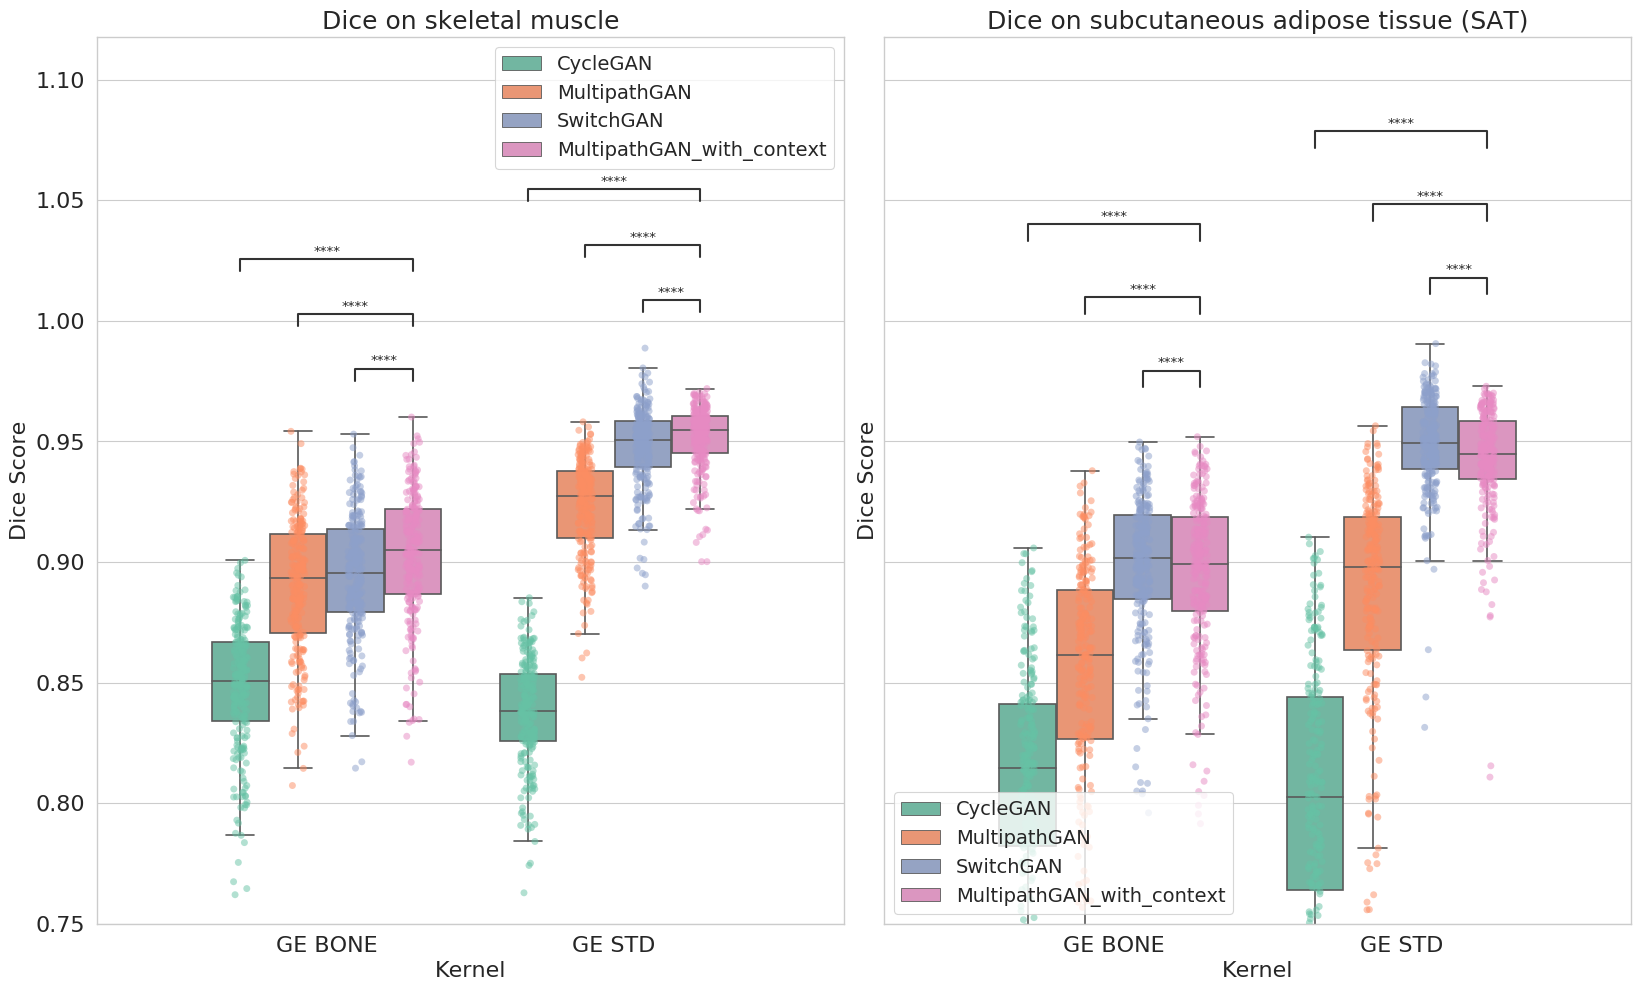

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
from scipy.stats import wilcoxon, ttest_rel

muscle_data = {
    'Value': bonetob30f_cycgan_muscle + bonetob30f_multi_muscle + bonetob30f_switchgan_muscle + bonetob30f_multipath_anatomy +
             stdtob30f_cycgan_muscle + stdtob30f_multi_muscle + stdtob30f_switchgan_muscle + stdtob30f_multipath_anatomy,
    'Method': ['CycleGAN'] * len(bonetob30f_cycgan_muscle) + ['MultipathGAN'] * len(bonetob30f_multi_muscle) + ['SwitchGAN'] * len(bonetob30f_switchgan_muscle) + ['MultipathGAN_with_context'] * len(bonetob30f_multipath_anatomy) +
              ['CycleGAN'] * len(stdtob30f_cycgan_muscle) + ['MultipathGAN'] * len(stdtob30f_multi_muscle) + ['SwitchGAN'] * len(stdtob30f_switchgan_muscle) + ['MultipathGAN_with_context'] * len(stdtob30f_multipath_anatomy),
    'Kernel': ['GE BONE'] * (len(bonetob30f_cycgan_muscle) + len(bonetob30f_multi_muscle) + len(bonetob30f_switchgan_muscle) + len(bonetob30f_multipath_anatomy)) +
              ['GE STD'] * (len(stdtob30f_cycgan_muscle) + len(stdtob30f_multi_muscle) + len(stdtob30f_switchgan_muscle) + len(bonetob30f_multipath_anatomy_fat)) 
}

fat_data = {
    'Value': bonetob30f_cycgan_fat + bonetob30f_multi_fat + bonetob30f_switchgan_fat + bonetob30f_multipath_anatomy_fat +
             stdtob30f_cycgan_fat + stdtob30f_multi_fat + stdtob30f_switchgan_fat + stdtob30f_multipath_anatomy_fat,
    'Method': ['CycleGAN'] * len(bonetob30f_cycgan_fat) + ['MultipathGAN'] * len(bonetob30f_multi_fat) + ['SwitchGAN'] * len(bonetob30f_switchgan_fat) + ['MultipathGAN_with_context'] * len(bonetob30f_multipath_anatomy_fat) +
              ['CycleGAN'] * len(stdtob30f_cycgan_fat) + ['MultipathGAN'] * len(stdtob30f_multi_fat) + ['SwitchGAN'] * len(stdtob30f_switchgan_fat) + ['MultipathGAN_with_context'] * len(stdtob30f_multipath_anatomy_fat),
    'Kernel': ['GE BONE'] * (len(bonetob30f_cycgan_fat) + len(bonetob30f_multi_fat) + len(bonetob30f_switchgan_fat) + len(bonetob30f_multipath_anatomy_fat)) +
              ['GE STD'] * (len(stdtob30f_cycgan_fat) + len(stdtob30f_multi_fat) + len(stdtob30f_switchgan_fat) + len(bonetob30f_multipath_anatomy_fat)) }

# Assuming muscle_data and fat_data are already defined
muscle_df = pd.DataFrame(muscle_data)
fat_df = pd.DataFrame(fat_data)

fig, axes = plt.subplots(1, 2, figsize=(16.5, 10), sharey=True)

# Plot the muscle data
sns.boxplot(x='Kernel', y='Value', hue='Method', data=muscle_df, ax=axes[0], palette='Set2', showfliers=False)
sns.stripplot(x='Kernel', y='Value', hue='Method', data=muscle_df, ax=axes[0], palette='Set2', dodge=True, alpha=0.5)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[0:4], labels[0:4], loc='best', fontsize=14)
axes[0].set_title("Dice on skeletal muscle", fontsize=18)
axes[0].set_xlabel("Kernel", fontsize=16)
axes[0].set_ylabel("Dice Score", fontsize=16)
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)

# Add statistical annotations for muscle data
add_stat_annotation(axes[0], data=muscle_df, x='Kernel', y='Value', hue='Method',
                    box_pairs=[(("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "CycleGAN")),
                               (("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "MultipathGAN")),
                               (("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "SwitchGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "CycleGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "MultipathGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "SwitchGAN"))],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=1)

# Plot the fat data
sns.boxplot(x='Kernel', y='Value', hue='Method', data=fat_df, ax=axes[1], palette='Set2', showfliers=False)
sns.stripplot(x='Kernel', y='Value', hue='Method', data=fat_df, ax=axes[1], palette='Set2', dodge=True, alpha=0.5)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[0:4], labels[0:4], loc='lower left', fontsize=14)
axes[1].set_title("Dice on subcutaneous adipose tissue (SAT)", fontsize=18)
axes[1].set_xlabel("Kernel", fontsize=16)
axes[1].set_ylabel("Dice Score", fontsize=16)
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)

# Add statistical annotations for fat data
add_stat_annotation(axes[1], data=fat_df, x='Kernel', y='Value', hue='Method',
                    box_pairs=[(("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "CycleGAN")),
                               (("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "MultipathGAN")),
                               (("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "SwitchGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "CycleGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "MultipathGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "SwitchGAN"))],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=1)

plt.tight_layout()
# plt.savefig("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/dice_scores_unpaired.png", dpi=300)
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
GE STD_SwitchGAN v.s. GE STD_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.460e-13 stat=6.250e+03
Using zero_method  wilcox
GE BONE_SwitchGAN v.s. GE BONE_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correction, P_val=7.706e-40 stat=9.300e+01
Using zero_method  wilcox
GE BONE_MultipathGAN v.s. GE BONE_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.777e-23 stat=3.567e+03
Using zero_method  wilcox
GE STD_MultipathGAN v.s. GE STD_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.409e-40 stat=0.000e+00
Using zero_method  wilcox
GE BONE_CycleGAN v.s. GE BONE_MultipathGAN_with_context: Wilcoxon test (paired samples) with Bonferroni correcti

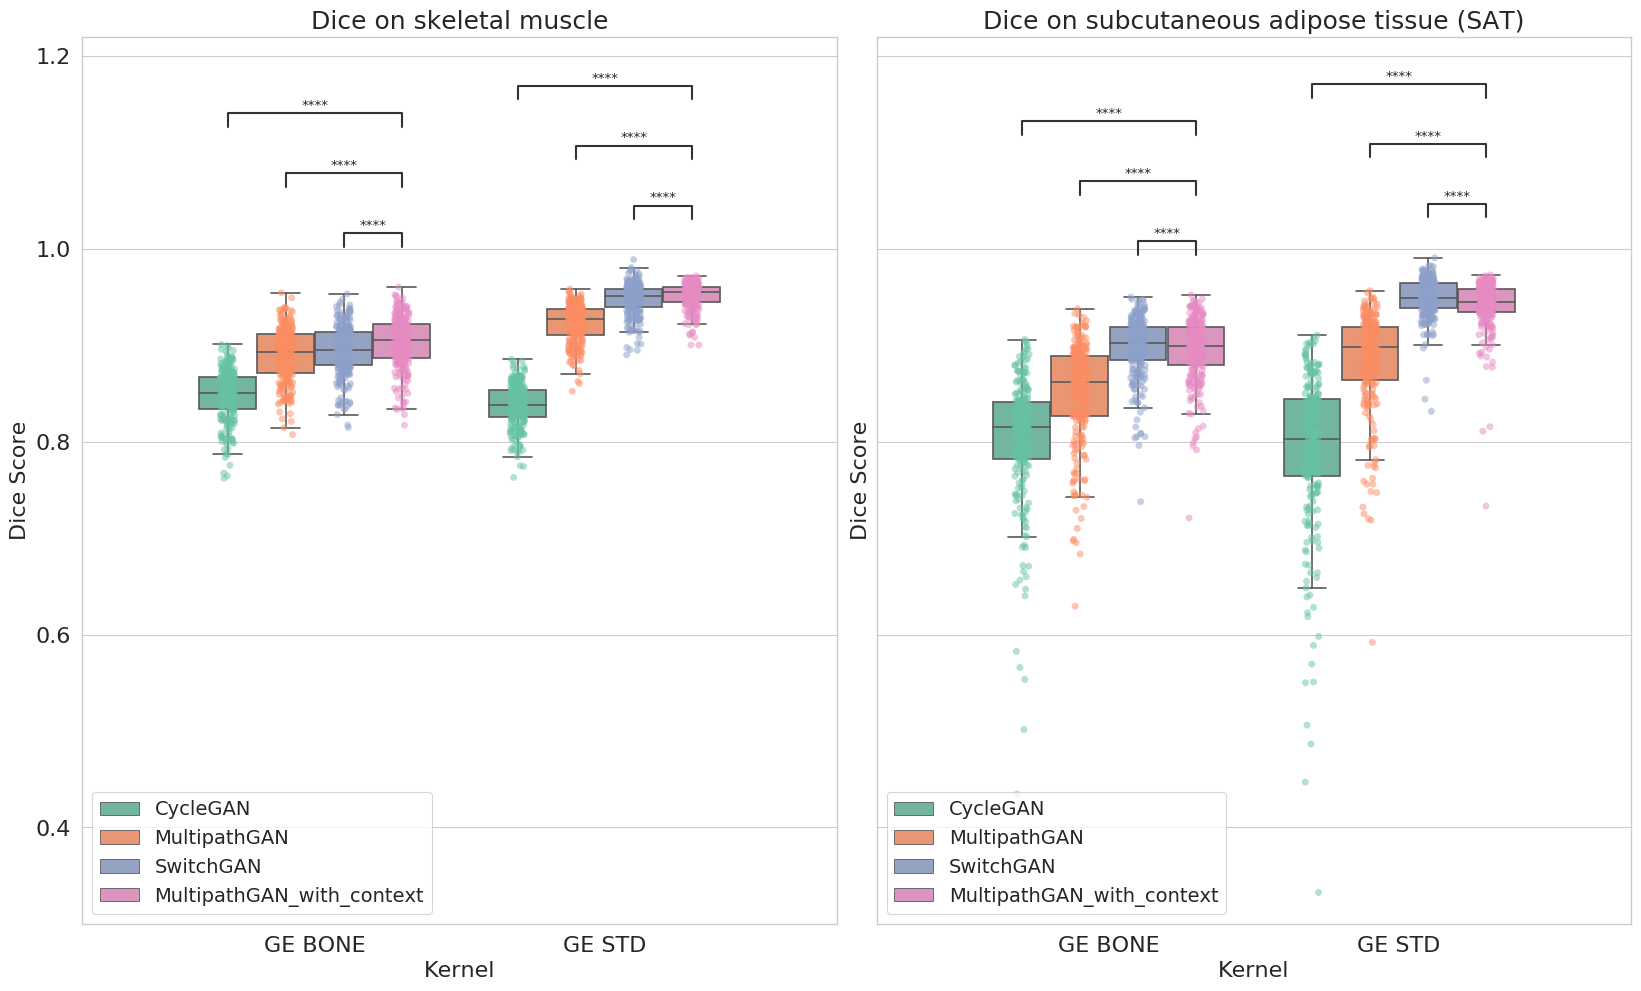

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
from scipy.stats import wilcoxon, ttest_rel

# Assuming the data is already loaded and prepared
muscle_data = {
    'Value': bonetob30f_cycgan_muscle + bonetob30f_multi_muscle + bonetob30f_switchgan_muscle + bonetob30f_multipath_anatomy +
             stdtob30f_cycgan_muscle + stdtob30f_multi_muscle + stdtob30f_switchgan_muscle + stdtob30f_multipath_anatomy,
    'Method': ['CycleGAN'] * len(bonetob30f_cycgan_muscle) + ['MultipathGAN'] * len(bonetob30f_multi_muscle) + ['SwitchGAN'] * len(bonetob30f_switchgan_muscle) + ['MultipathGAN_with_context'] * len(bonetob30f_multipath_anatomy) +
              ['CycleGAN'] * len(stdtob30f_cycgan_muscle) + ['MultipathGAN'] * len(stdtob30f_multi_muscle) + ['SwitchGAN'] * len(stdtob30f_switchgan_muscle) + ['MultipathGAN_with_context'] * len(stdtob30f_multipath_anatomy),
    'Kernel': ['GE BONE'] * (len(bonetob30f_cycgan_muscle) + len(bonetob30f_multi_muscle) + len(bonetob30f_switchgan_muscle) + len(bonetob30f_multipath_anatomy)) +
              ['GE STD'] * (len(stdtob30f_cycgan_muscle) + len(stdtob30f_multi_muscle) + len(stdtob30f_switchgan_muscle) + len(stdtob30f_multipath_anatomy))
}

fat_data = {
    'Value': bonetob30f_cycgan_fat + bonetob30f_multi_fat + bonetob30f_switchgan_fat + bonetob30f_multipath_anatomy_fat +
             stdtob30f_cycgan_fat + stdtob30f_multi_fat + stdtob30f_switchgan_fat + stdtob30f_multipath_anatomy_fat,
    'Method': ['CycleGAN'] * len(bonetob30f_cycgan_fat) + ['MultipathGAN'] * len(bonetob30f_multi_fat) + ['SwitchGAN'] * len(bonetob30f_switchgan_fat) + ['MultipathGAN_with_context'] * len(bonetob30f_multipath_anatomy_fat) +
              ['CycleGAN'] * len(stdtob30f_cycgan_fat) + ['MultipathGAN'] * len(stdtob30f_multi_fat) + ['SwitchGAN'] * len(stdtob30f_switchgan_fat) + ['MultipathGAN_with_context'] * len(stdtob30f_multipath_anatomy_fat),
    'Kernel': ['GE BONE'] * (len(bonetob30f_cycgan_fat) + len(bonetob30f_multi_fat) + len(bonetob30f_switchgan_fat) + len(bonetob30f_multipath_anatomy_fat)) +
              ['GE STD'] * (len(stdtob30f_cycgan_fat) + len(stdtob30f_multi_fat) + len(stdtob30f_switchgan_fat) + len(stdtob30f_multipath_anatomy_fat))
}

# Create dataframes
muscle_df = pd.DataFrame(muscle_data)
fat_df = pd.DataFrame(fat_data)

fig, axes = plt.subplots(1, 2, figsize=(16.5, 10), sharey=True)

# Plot the muscle data
sns.boxplot(x='Kernel', y='Value', hue='Method', data=muscle_df, ax=axes[0], palette='Set2', showfliers=False)
sns.stripplot(x='Kernel', y='Value', hue='Method', data=muscle_df, ax=axes[0], palette='Set2', dodge=True, alpha=0.5)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[0:4], labels[0:4], loc='best', fontsize=14)
axes[0].set_title("Dice on skeletal muscle", fontsize=18)
axes[0].set_xlabel("Kernel", fontsize=16)
axes[0].set_ylabel("Dice Score", fontsize=16)
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].set_ylim(0.3, 1)

# Add statistical annotations for muscle data
add_stat_annotation(axes[0], data=muscle_df, x='Kernel', y='Value', hue='Method',
                    box_pairs=[(("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "CycleGAN")),
                               (("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "MultipathGAN")),
                               (("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "SwitchGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "CycleGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "MultipathGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "SwitchGAN"))],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=1)

# Plot the fat data
sns.boxplot(x='Kernel', y='Value', hue='Method', data=fat_df, ax=axes[1], palette='Set2', showfliers=False)
sns.stripplot(x='Kernel', y='Value', hue='Method', data=fat_df, ax=axes[1], palette='Set2', dodge=True, alpha=0.5)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[0:4], labels[0:4], loc='lower left', fontsize=14)
axes[1].set_title("Dice on subcutaneous adipose tissue (SAT)", fontsize=18)
axes[1].set_xlabel("Kernel", fontsize=16)
axes[1].set_ylabel("Dice Score", fontsize=16)
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].set_ylim(0.3, 1)

# Add statistical annotations for fat data
add_stat_annotation(axes[1], data=fat_df, x='Kernel', y='Value', hue='Method',
                    box_pairs=[(("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "CycleGAN")),
                               (("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "MultipathGAN")),
                               (("GE BONE", "MultipathGAN_with_context"), ("GE BONE", "SwitchGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "CycleGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "MultipathGAN")),
                               (("GE STD", "MultipathGAN_with_context"), ("GE STD", "SwitchGAN"))],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=1)

plt.tight_layout()
plt.savefig("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/dice_scores_unpaired.png", dpi=300)
plt.show()